<div align='center' ><img src='https://raw.githubusercontent.com/davidrpugh/numerical-methods/master/images/sgpe-logo.jpg' width="1200" height="100"></div>
<div align='right'><img src='https://raw.githubusercontent.com/davidrpugh/numerical-methods/master/images/SIRElogolweb.jpg' width="1200" height="100"></div>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sympy as sym
sym.init_printing() 
import solowpy

In [3]:
# define model parameters
ces_params = {'A0': 1.0, 'L0': 1.0, 'g': 0.02, 'n': 0.03, 's': 0.15,
              'delta': 0.05, 'alpha': 0.33, 'sigma': 0.95}

# create an instance of the solow.Model class
ces_model = solowpy.CESModel(params=ces_params)

# 3. Graphical analysis using Matplotlib and IPython widgets

As the primary use of this module is for teaching purposes, there are a number of pedagogically useful plotting methods. I will demonstrate the basic usage of only a few of them below. To see a full listing of the available plotting methods use tab-completion on the cell below.

In [5]:
# use tab completion to see complete list
ces_model.plot_factor_sharesf()

AttributeError: 'CESModel' object has no attribute 'plot_factor_sharesf'

### Static example:
Creating a static plot of the classic Solow diagram is done as follows.

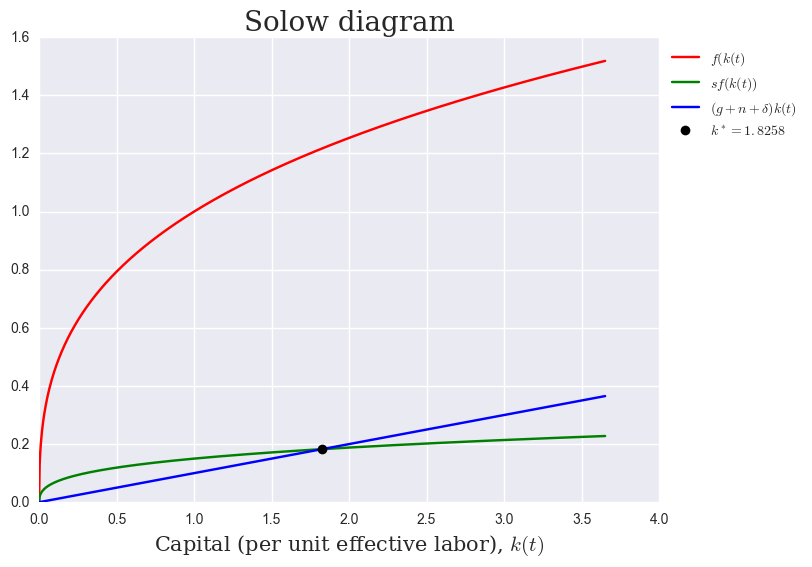

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ces_model.plot_solow_diagram(ax)
fig.show()

## Interactive example:
All of the various plotting methods can be made interactive using IPython widgets. To construct an IPython widget we need the following additional `import` statements.

In [6]:
#from IPython.html.widgets import fixed, interact, FloatSliderWidget
from IPython.html.widgets import fixed, interact

from ipywidgets import interact, FloatSlider, IntSlider

Creating an interactive plot of the classic Solow diagram is done as follows.

<function __main__.interactive_solow_diagram>

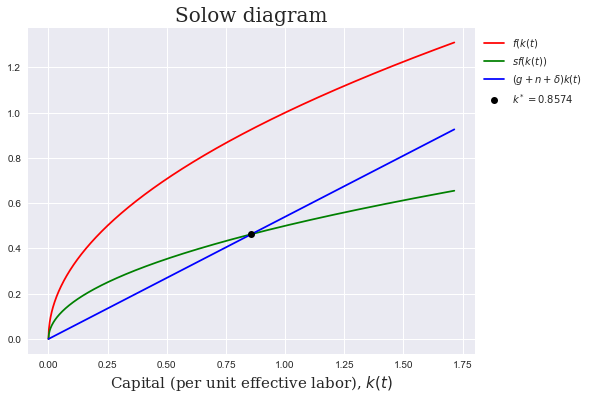

In [7]:
# wrap the static plotting code in a function
def interactive_solow_diagram(model, **params):
    """Interactive widget for the factor shares."""
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    model.plot_solow_diagram(ax, Nk=1000, **params)
    
# define some widgets for the various parameters
eps = 1e-2
technology_progress_widget = FloatSlider(min=-0.05, max=0.05, step=eps, value=0.02)
population_growth_widget = FloatSlider(min=-0.05, max=0.05, step=eps, value=0.02)
savings_widget = FloatSlider(min=eps, max=1-eps, step=eps, value=0.5)
output_elasticity_widget = FloatSlider(min=eps, max=1.0, step=eps, value=0.5)
depreciation_widget = FloatSlider(min=eps, max=1-eps, step=eps, value=0.5)
elasticity_substitution_widget = FloatSlider(min=eps, max=10.0, step=0.01, value=1.0+eps)

# create the widget!
interact(interactive_solow_diagram, 
         model=fixed(ces_model),
         g=technology_progress_widget,
         n=population_growth_widget,
         s=savings_widget, 
         alpha=output_elasticity_widget,
         delta=depreciation_widget,
         sigma=elasticity_substitution_widget,
         )

## 3.1 Intensive production function
Creating an interactive plot of the intensive production function is done as follows.

In [7]:
model.plot_intensive_output?

<function __main__.interactive_intensive_output>

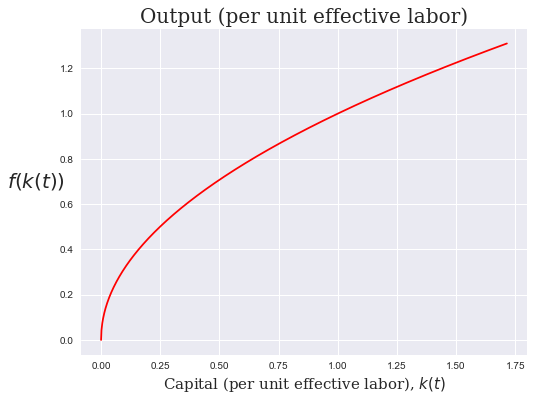

In [9]:
def interactive_intensive_output(model, **params):
    """Interactive widget for the intensive production function."""
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    model.plot_intensive_output(ax, Nk=1000, **params)
    
# define some widgets for the various parameters
eps = 1e-2
output_elasticity_widget = FloatSlider(min=eps, max=1-eps, step=0.1, value=0.5)
elasticity_substitution_widget = FloatSlider(min=eps, max=10.0, step=0.5, value=1.0+eps)

# create the interactive plot
interact(interactive_intensive_output,
         model=fixed(ces_model),
         alpha=output_elasticity_widget,
         sigma=elasticity_substitution_widget
         )

##3.2  Factor shares
Creating an interactive plot of factor shares for capital and labor is done as follows.

<function __main__.interactive_factor_shares>

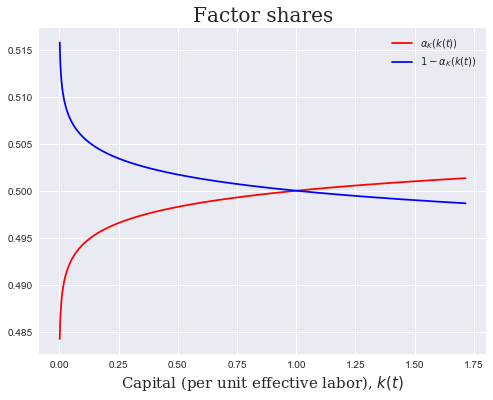

In [10]:
def interactive_factor_shares(model, **params):
    """Interactive widget for the factor shares."""
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    model.plot_factor_shares(ax, Nk=1000, **params)
    
# define some widgets for the various parameters
eps = 1e-2
technology_progress_widget = FloatSlider(min=-0.05, max=0.05, step=eps, value=0.02)
population_growth_widget = FloatSlider(min=-0.05, max=0.05, step=eps, value=0.02)
savings_widget = FloatSlider(min=eps, max=1-eps, step=eps, value=0.5)
output_elasticity_widget = FloatSlider(min=eps, max=1.0-eps, step=eps, value=0.5)
depreciation_widget = FloatSlider(min=eps, max=1-eps, step=eps, value=0.5)
elasticity_substitution_widget = FloatSlider(min=eps, max=10.0, step=0.5, value=1.0+eps)

# create the widget!
interact(interactive_factor_shares, 
         model=fixed(ces_model),
         g=technology_progress_widget,
         n=population_growth_widget,
         s=savings_widget, 
         alpha=output_elasticity_widget,
         delta=depreciation_widget,
         sigma=elasticity_substitution_widget,
         )

## 3.4 Phase Diagram
Creating an interactive plot of the phase diagram for the Solow model is done as follows.

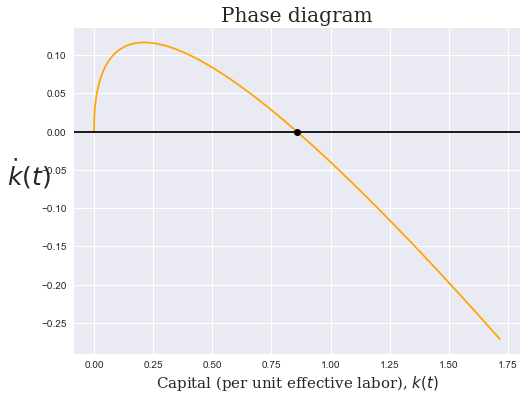

In [11]:
def interactive_phase_diagram(model, **params):
    """Interactive widget for the phase diagram."""
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    model.plot_phase_diagram(ax, Nk=1000, **params)
    
# define some widgets for the various parameters
eps = 1e-2
technology_progress_widget = FloatSlider(min=-0.05, max=0.05, step=eps, value=0.02)
population_growth_widget = FloatSlider(min=-0.05, max=0.05, step=eps, value=0.02)
savings_widget = FloatSlider(min=eps, max=1-eps, step=eps, value=0.5)
output_elasticity_widget = FloatSlider(min=eps, max=1-eps, step=eps, value=0.5)
depreciation_widget = FloatSlider(min=eps, max=1-eps, step=eps, value=0.5)
elasticity_substitution_widget = FloatSlider(min=eps, max=10.0, step=0.5, value=1.0+eps)


# create the widget!
phase_diagram_widget = interact(interactive_phase_diagram, 
                                model=fixed(ces_model),
                                g=technology_progress_widget,
                                n=population_growth_widget,
                                s=savings_widget, 
                                alpha=output_elasticity_widget,
                                delta=depreciation_widget,
                                sigma=elasticity_substitution_widget
                                )